## Оглавление
1. [Изучение данных из файла](#read_data)
2. [Предобработка данных](#pre_processing)
3. [Расчёты и добавление результатов в таблицу](#add_results)
4. [Исследовательский анализ данных](#research)
5. [Портрет пользователя каждого региона](#user)
6. [Гипотезы](#hypothesis)
7. [Общий вывод](#sumup)



# Определение закономерностей, влияющих на успешность игр
Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования** — необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**

Перед проверкой гипотез понадобится обзор и предобработка данных данных.

Необходимо проверить данные на ошибки и оценить их влияние на исследование. Затем мы устраним проблемы, проведем исследовательский анализ данных и проверим гипотезы.

Таким образом, исследование пройдёт в шесть этапов:

1. Обзор данных.
2. Предобработка данных.
3. Расчеты и добавление результатов.
4. Исследовательский анализ:
 * проверим, сколько игр выпускалось в разные годы;
 * посмотрим, как менялись продажи по платформам;
 * узнаем, за какой характерный срок появляются новые и исчезают старые платформы;
 * проверим, какие платформы лидируют по продажам, растут или падают и выберем несколько потенциально прибыльных платформ;
 * построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
 * посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков и соотнесем выводы с продажами игр на других платформах;
 * посмотрим на общее распределение игр по жанрам и выделим самые прибыльные жанры.
5. Составление портрета пользователя каждого региона (NA, EU, JP):
  * Самые популярные платформы (топ-5);
  * Самые популярные жанры (топ-5);
  * Влияет ли рейтинг ESRB на продажи в отдельном регионе?
6. Проверка гипотез:
Узнаем:
 * равны ли средние пользовательские рейтинги платформ Xbox One и PC;
 * равны ли средние пользовательские рейтинги жанров Action и Sports.

## 1. Изучение данных из файла
<a name="read_data"></a>

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

In [428]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [429]:
# изучим данные

try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [430]:
data.info() # выведем сводную информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

В таблице из 16715 строк и 11 столбцов представлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

Предварительно можно утверждать, что данных достаточно для выполнения задачи - определения закономерностей, влияющих на успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Но для окончательного ответа на этот вопрос нужно провести предобработку данных.

На данный момент очевидно, что необходимо:

* привести названия столбцов к змеиному регистру;
* изменить тип данных для столбца `user_score` на float;
* проверить данные на пропуски, дубликаты и аномалии.

Сделаем это в следующем блоке.

## 2. Предобработка данных
<a name="pre_processing"></a>

In [431]:
# приведем названия столбцов к змеиному регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [432]:
# изменим тип данных для столбца year_of_release
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y') 


In [433]:
# пророверим на аномалии столбец user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [434]:
len(data.query('user_score == "tbd"'))
# в этом столбце в 14% случаев от общего числа строк встречаются значение tbd - to be determined,
# что означает, что какая-то информация еще не определена или решение по вопросу не принято
# изменим это значение на Nan, чтобы изменить тип столбца на float

2424

In [435]:
# изменим тип данных для столбца user_score на float, установив параметр coerce, который заменит все выбивающиеся занчения на NaN 
data['user_score'] = pd.to_numeric(data.loc[:, 'user_score'], errors='coerce') 

data.info() # проверим результат


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


In [436]:
data.isna().sum() # проверим количество пропущенных значений

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [437]:
data.isna().mean() # проверим долю пропущенных значений

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

In [438]:
# удалим строки с пропущенными значениями в столбцах name, year_of_release, genre, т.к. их доля очень мала
data = data.dropna(subset=['name','year_of_release','genre'])
data.isna().mean() # проверим результат


name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.405984
dtype: float64

Оставим пропущенными значения в столбцах `critic_score`, `user_score` и `rating`. Вероятно, они появились из-за отсутствия этих данных в момент выгрузки таблицы. Их доля велика, а заполнение медианой может повлиять на характер связи между заполняемой переменной и остальными.

In [439]:
# проверим на аномалии столбец name
data['name'].describe()

# в столбце name 11426 различных названий игр, проверить каждое название не представляется возможным


count                           16444
unique                          11426
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

In [440]:
# проверим на аномалии столбец platform
data['platform'].unique()

# аномалий нет

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [441]:
# проверим на аномалии столбец year_of_release
data['year_of_release'].describe()

# большинство игр начало продаваться в 2000-е

<ipython-input-441-7fb9f4205395>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['year_of_release'].describe()


count                   16444
unique                     37
top       2008-01-01 00:00:00
freq                     1427
first     1980-01-01 00:00:00
last      2016-01-01 00:00:00
Name: year_of_release, dtype: object

In [442]:
# проверим на аномалии столбец genre
data['genre'].unique()

# аномалий нет

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [443]:
# проверим на аномалии столбец na_sales
data['na_sales'].describe()

# виден большой разброс в сторону увеличения, в первом процентиле все значения - нулевые, 
# т.е. много игр в Северной Америке не продавалось совсем,
# в то же время есть явные лидеры продаж с большим отрывом

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [444]:
# проверим на аномалии столбец eu_sales
data['eu_sales'].describe()

# ситуация в Европе схожа с ситуацией по продажам в СА

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [445]:
# проверим на аномалии столбец jp_sales
data['jp_sales'].describe()

# в Японии либо продаж не было совсем, либо они были очень высокими

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [446]:
# проверим на аномалии столбец other_sales
data['other_sales'].describe()

# в остальном мире ситуация схожа с ситуцией в Японии

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

In [447]:
# проверим на аномалии столбец critic_score
data['critic_score'].describe()

# аномалий нет

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [448]:
# проверим на аномалии столбец rating
data['rating'].unique()

# аномалий нет

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [449]:
# проверим данные на наличие дубликатов
data.duplicated().sum() # дубликатов нет

0

### Вывод

Предобработка показала, что в данных есть пропуски и аномалии. Также потребовалась замена типов данных для столбца `user_score` на float.

Основные выводы:

* мы привели названия столбцов к змеиному регистру;
* в столбце `user_score` в 14% случаев встречаются значение tbd - to be determined, что означает, что какая-то информация еще не определена или решение по вопросу не принято. Мы изменили значение на NaN;
* мы удалили строки с пропущенными значениями в столбцах `name`, `year_of_release`, `genre`, т.к. их доля очень мала
* мы оставили пропущенными значения в столбцах `critic_score`, `user_score` и `rating`. Вероятно, они появились из-за отсутствия этих данных в момент выгрузки таблицы. Их доля велика, а заполнение медианой может повлиять на характер связи между заполняемой переменной и остальными;
* большинство игр начало продаваться в 2000-е;
* существует большой разброс в сторону увеличения количества продаж в Северной Америке и Европе, в первом процентиле все значения - нулевые, т.е. много игр не продавалось совсем, в то же время есть явные лидеры продаж с большим отрывом;
* в Японии и остальном мире продаж либо не было совсем, либо они были очень высокими.



## 3. Расчёты и добавление результатов в таблицу
<a name="add_results"></a>

In [450]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## 4. Исследовательский анализ данных
<a name="research"></a>

### Задача

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,name
year_of_release,
1980-01-01,9
1981-01-01,46
1982-01-01,36
1983-01-01,17
1984-01-01,14
1985-01-01,14
1986-01-01,21
1987-01-01,16
1988-01-01,15


<Axes: title={'center': 'Количество выпущенных игр'}, xlabel='year_of_release'>

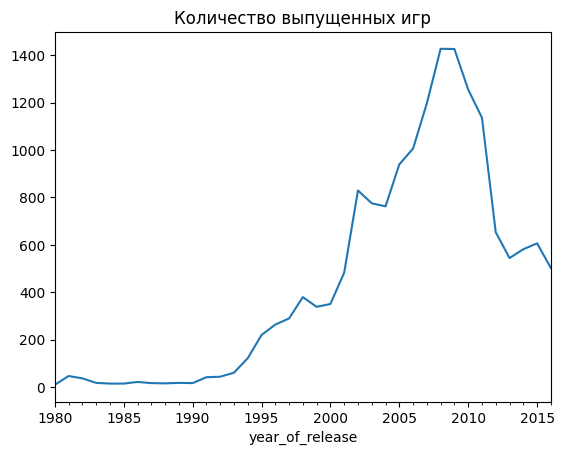

In [451]:
# проверим, сколько игр выпускалось за разные периоды
years = data.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='year_of_release')
display(years)
years.plot(title='Количество выпущенных игр', legend=False)


По количеству выпущенных игр определенно лидирует период с 2005 по 2011 годы, с ярким пиком в 2008-2009 годах. Одного лишь этого мало для достижения поставленной задачи — выявления определяющих успех игры закономерностей. Однако анализ данных за более чем 20-летний период не представляется логичным, за такой период факторы, влияющие на успех, скорее всего изменились. Ограничимся периодом с 2013 года.

In [452]:
# Посмотрим, как менялись продажи по платформам
platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platforms = platforms.sort_values(by='total_sales', ascending=False)
platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [453]:
# ограничим данные по продажам игр начиная с 2013 года
modern_platforms = data.query('year_of_release > 2012')

# посмотрим на самые продаваемые платформы 
top_platforms = modern_platforms.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
display(top_platforms.sort_values(by='total_sales', ascending=False))

# создадим список из пяти самых успешных платформ
platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
data_top_platforms = data.query('platform in @platforms and year_of_release > 2012')

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


In [454]:
# создадим таблицу с топ-платформами и распределением их продаж по годам
top_platforms_by_years = data_top_platforms.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
display(top_platforms_by_years)
top_platforms_by_years = top_platforms_by_years.reset_index()


total_sales
platform year_of_release             
3DS      2013-01-01             56.57
         2014-01-01             43.76
         2015-01-01             27.78
         2016-01-01             15.14
PS3      2013-01-01            113.25
         2014-01-01             47.76
         2015-01-01             16.82
         2016-01-01              3.60
PS4      2013-01-01             25.99
         2014-01-01            100.00
         2015-01-01            118.90
         2016-01-01             69.25
X360     2013-01-01             88.58
         2014-01-01             34.74
         2015-01-01             11.96
         2016-01-01              1.52
XOne     2013-01-01             18.96
         2014-01-01             54.07
         2015-01-01             60.14
         2016-01-01             26.15

<Axes: xlabel='year_of_release', ylabel='total_sales'>

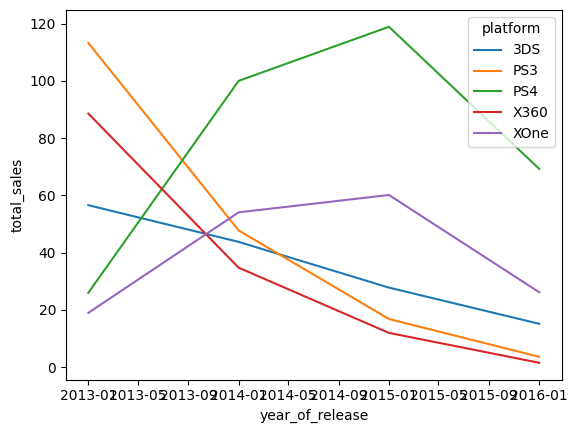

In [455]:
# построим линейный график распределения продаж по годам для разных платформ
sns.lineplot(data=top_platforms_by_years, x='year_of_release', y='total_sales', hue='platform')

<Axes: xlabel='year_of_release', ylabel='platform'>

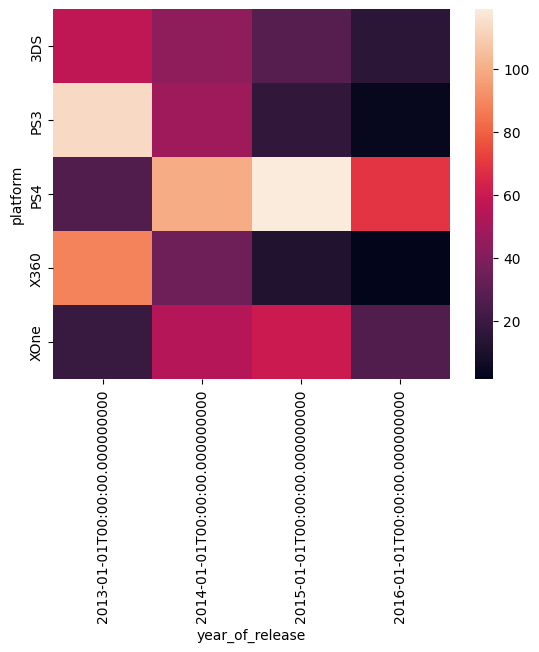

In [456]:
# построим тепловой график распределения продаж по годам для разных платформ
pivot = top_platforms_by_years.pivot_table(
    index=["platform"],
    columns=["year_of_release"],
    values="total_sales",
    aggfunc=np.sum)
sns.heatmap(pivot)

Из графиков очевидно, что продажи по всем платформам упали к концу 2016 года, при этом для трех платформ падение продолжалось с 2013 года - видна устойчивая тенденция к снижению продаж. Продажи для PS4 и XOne за исследуемый период пережили взлет и начали медленное падение в 2015 году. Лидер по числу проданных копий - PS4 (пик в 2015 году - почти 119 млн.копий), затем с небольшим отрывом следует PS3 - 113.25 млн. копий в 2013 году. При этом в 2016 году для PS4 было продано всего 69.25 млн. копий, т.е. продажи упали в 1.7 раз. Минимум продаж к концу исследуемого периода пришелся на X360 - 1.52 млн.копий.


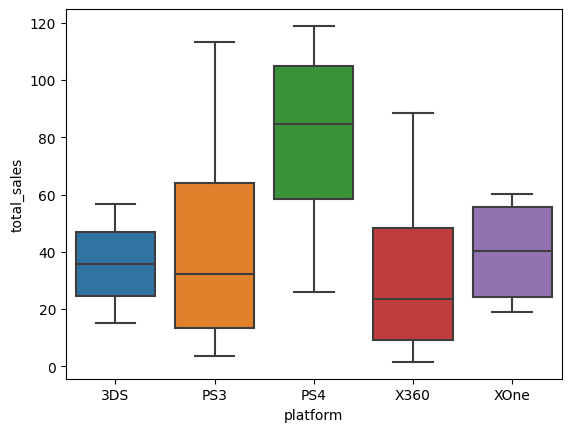

In [457]:
# Построим график «ящик с усами» по глобальным продажам игр в разбивке по популярным платформам за период с 2013 года
sns.boxplot(x=top_platforms_by_years['platform'], y=top_platforms_by_years['total_sales']) 
plt.show()



"Ящик с усами" позволяет сделать следующие выводы:
* в данных о продажах нет выбросов для всех платформ;
* больше всего скошены вверх данные платформ X360 и PS3 — медианы находятся на отметке около 25 млн.копий, а значения выше этой цифры имеют гораздо больший размах, чем расположенные ниже. Это значит в определенный период продажи игр на этих платформах начали меняться каждый год с большим размахом;
* выше всего по отношению к остальным платформам медиана расположена у PS4 — около 90 млн.копий;
* у XOne и 3DS наиболее гармоничные межквартильные размахи с равномерным распределением данных между Q1 и Q3, т.е. размер количества проданных копий менялся равномерно;
* нижние "усы" у PS3 и X360 начинаются практически на нулевой отметке;
* у PS3 самый длинный верхний "ус", упирающийся в отметку в 118 млн.копий: в один из периодов для этой платформы было продано гораздо больше копий, чем в остальные годы.



,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


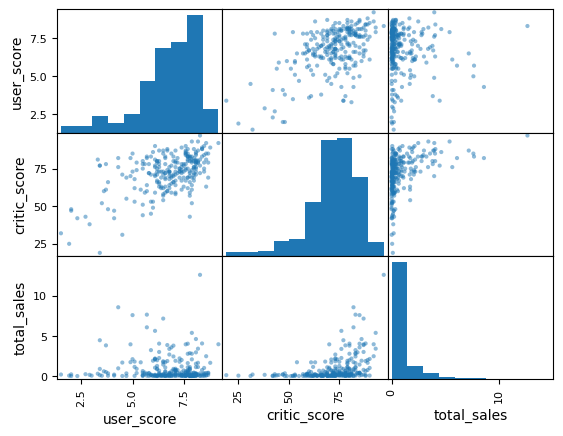

In [458]:
# Посмотрим, как влияют на продажи внутри популярной платформы PS4 отзывы пользователей и критиков
PS4_platform = data_top_platforms[['platform','user_score', 'critic_score', 'total_sales']].query('platform == "PS4"')

# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
pd.plotting.scatter_matrix(PS4_platform)
PS4_platform.corr()


Мы посчитали корреляцию между отзывами и продажами, а также построили диаграмму рассеяния для платформы PS4. На основании полученного результата можно сделать следующие выводы:
* самый высокий коэффициент корреляции между параметрами user score и critic score (5.5). Это значит, что отзывы критиков влияют на отзывы пользователей и наоборот, но это влияние не очень высокое. На диаграмме рассеяния также видно, что отзывов с положительными оценками со стороны обеих групп намного больше, чем с отрицательными. А варианты с низкими оценками с одной стороны и высокими с другой единичны;
* влияния отзывов пользователей на продажи практически нет, коэффициент очень низкий (-0.03), но в то же время он отрицательный, т.е. либо рост продаж минимально влияет на снижение оценки пользователями, либо наоборот. Коэффициент влияния оценки критиков на продажи выше— 0.4 — это говорит о том, что положительная корреляция присутствует. Диаграмма рассеяния также показывает, что скачки продаж на платформе происходили только для игр с высокими отзывами со стороны критиков.

,user_score,critic_score,total_sales
user_score,1.000000,0.520946,-0.011742
critic_score,0.520946,1.000000,0.350345
total_sales,-0.011742,0.350345,1.000000


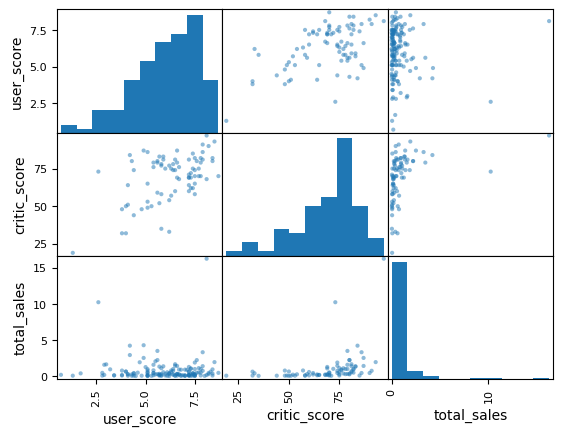

In [459]:
# Посмотрим, как влияют на продажи внутри популярной платформы X360 отзывы пользователей и критиков. 
X360_platform = data_top_platforms[['platform','user_score', 'critic_score', 'total_sales']].query('platform == "X360"')

# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
pd.plotting.scatter_matrix(X360_platform)
X360_platform.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.769536,0.241504
critic_score,0.769536,1.000000,0.357057
total_sales,0.241504,0.357057,1.000000


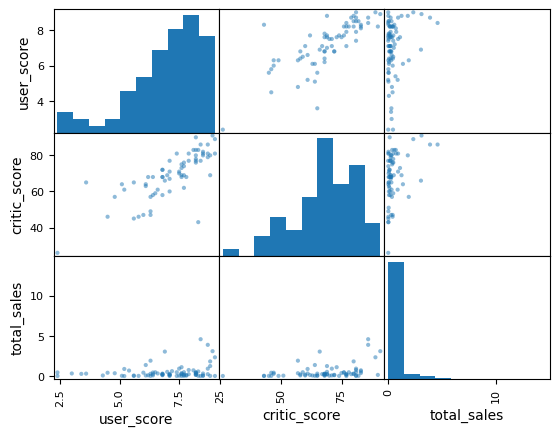

In [460]:
# Посмотрим, как влияют на продажи внутри популярной платформы 3DS отзывы пользователей и критиков. 
three_DS_platform = data_top_platforms[['platform','user_score', 'critic_score', 'total_sales']].query('platform == "3DS"')

# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
pd.plotting.scatter_matrix(three_DS_platform)
three_DS_platform.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.599920,0.002394
critic_score,0.599920,1.000000,0.334285
total_sales,0.002394,0.334285,1.000000


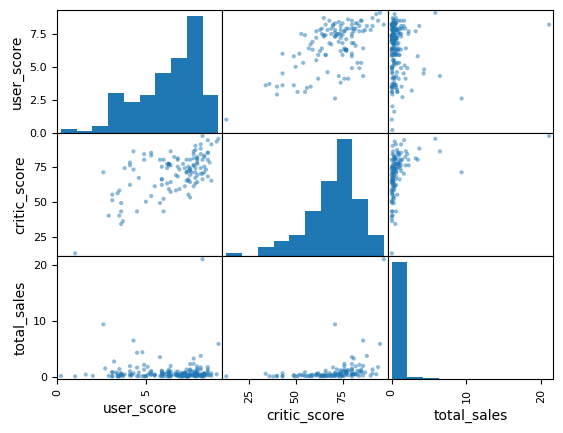

In [461]:
# Посмотрим, как влияют на продажи внутри популярной платформы PS3 отзывы пользователей и критиков. 
PS3_platform = data_top_platforms[['platform','user_score', 'critic_score', 'total_sales']].query('platform == "PS3"')

# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
pd.plotting.scatter_matrix(PS3_platform)
PS3_platform.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
total_sales,-0.068925,0.416998,1.000000


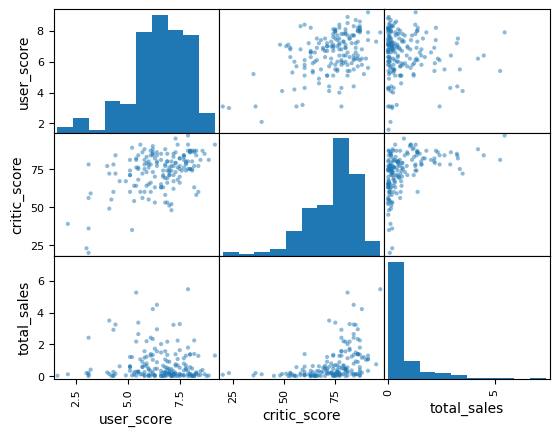

In [462]:
# Посмотрим, как влияют на продажи внутри популярной платформы XOne отзывы пользователей и критиков. 
XOne_platform = data_top_platforms[['platform','user_score', 'critic_score', 'total_sales']].query('platform == "XOne"')

# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
pd.plotting.scatter_matrix(XOne_platform)
XOne_platform.corr()

Мы посчитали корреляцию между отзывами и продажами, а также построили диаграмму рассеяния для других популярных платформ: 3DS, XOne, PS3, X360. На основании полученного результата можно сделать следующие выводы:

* коэффициент корреляции между параметрами user score и critic score для данных платформ (кроме 3DS) так же невысок, для 3DS он составляет 0.77. Это значит, что для платформы 3DS отзывы критиков влияют на отзывы пользователей и наоборот. На диаграмме рассеяния также видно, что отзывов с положительными оценками со стороны обеих групп намного больше, чем с отрицательными. А варианты с низкими оценками с одной стороны и высокими с другой единичны;
* влияния отзывов на продажи практически нет, коэффициенты по-прежнему низкие. Самый высокий показатель зависимости между продажами и оценками критиков - у платформ XOne (0.42). Диаграмма рассеяния показывает, что скачки продаж на платформах происходили только для игр с высокими отзывами со стороны критиков, но со стороны пользователей для данных случаев оценки могли быть и невысокими.

In [463]:
# Посмотрим на средние показатели продаж игр, выпущенных с 2013 года, по жанрам для популярных платформ

top_platforms_by_genres = data_top_platforms.pivot_table(index=['genre'], values='total_sales')
top_platforms_by_genres.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,1.491172
Sports,0.838118
Role-Playing,0.694728
Action,0.548868
Racing,0.491563
Platform,0.486809
Misc,0.444592
Fighting,0.443016
Simulation,0.372857


Из таблицы видно, что самым прибыльным жанром с явным отрывом от остальных является Shooter. В топ-5 также входят Sports, Role-Playing, Action и Racing. Также достаточно сильно заметна разница в продажах для жанров, находящихся внизу таблицы. Самый популярный жанр Shooter приносит в 12 раза больше дохода, чем самый неприбыльный жанр Strategy. 

##  5. Портрет пользователя каждого региона
<a name="user"></a>

### Задача
Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<Axes: xlabel='platform'>

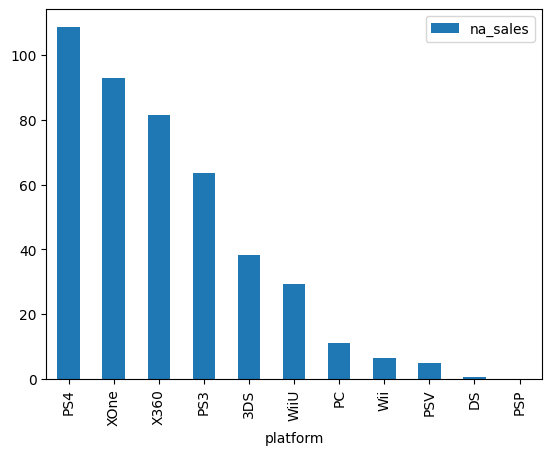

In [464]:
# Определим самые популярные платформы для региона NA для игр, выпущенных с 2013 года
since_2013_platforms = data.query('year_of_release > 2012')
data_top_NA_platforms = since_2013_platforms.pivot_table(index=['platform'], values='na_sales', aggfunc='sum')
data_top_NA_platforms.sort_values(by='na_sales', ascending=False).plot(kind = 'bar')


<Axes: xlabel='platform'>

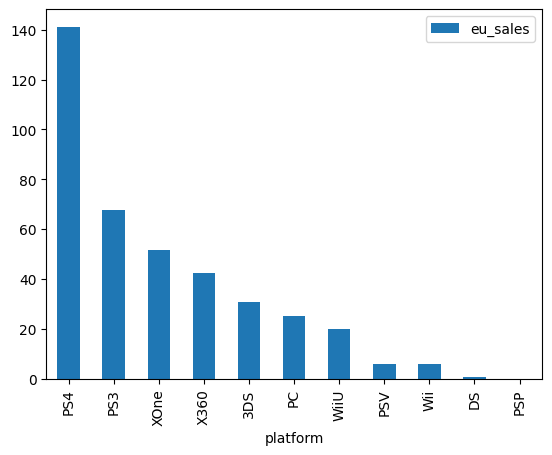

In [465]:
# Определим самые популярные платформы для региона EU для игр, выпущенных с 2013 года
data_top_EU_platforms = since_2013_platforms.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
data_top_EU_platforms.sort_values(by='eu_sales', ascending=False).plot(kind = 'bar')

<Axes: xlabel='platform'>

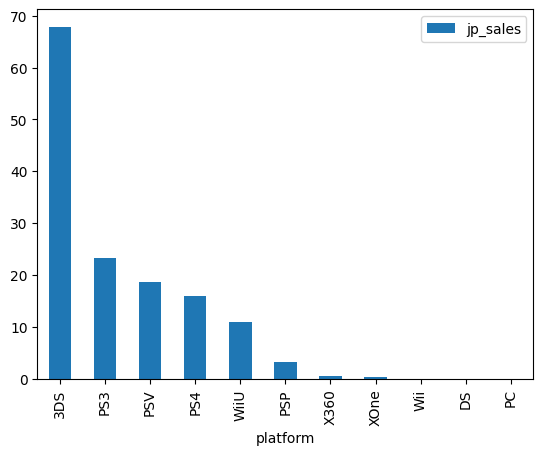

In [483]:
# Определим самые популярные платформы для региона JP для игр, выпущенных с 2013 года
data_top_JP_platforms = since_2013_platforms.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
data_top_JP_platforms.sort_values(by='jp_sales', ascending=False).plot(kind = 'bar')


<Axes: xlabel='genre'>

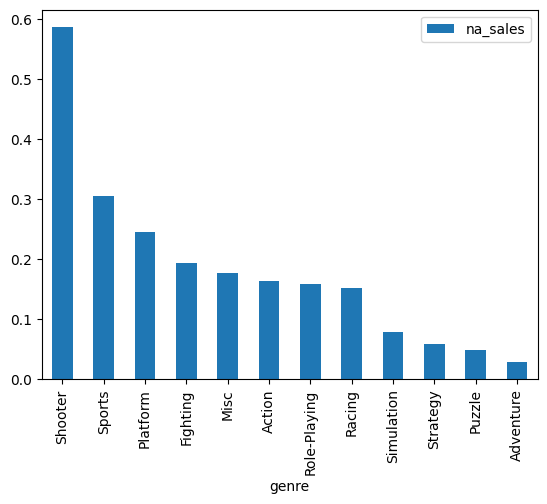

In [467]:
# Определим самые популярные жанры для региона NA для игр, выпущенных с 2013 года
data_top_NA_platforms_genre = since_2013_platforms.pivot_table(index=['genre'], values='na_sales')
data_top_NA_platforms_genre.sort_values(by='na_sales', ascending=False).plot(kind = 'bar')

<Axes: xlabel='genre'>

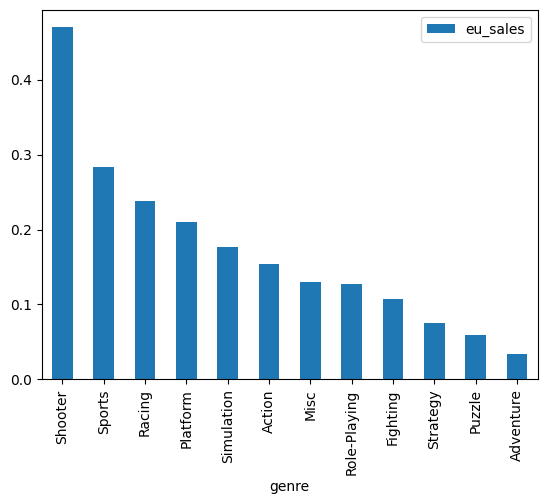

In [468]:
# Определим самые популярные жанры для региона EU для игр, выпущенных с 2013 года
data_top_EU_platforms_genre = since_2013_platforms.pivot_table(index='genre', values='eu_sales')
data_top_EU_platforms_genre.sort_values(by='eu_sales', ascending=False).plot(kind = 'bar')

<Axes: xlabel='genre'>

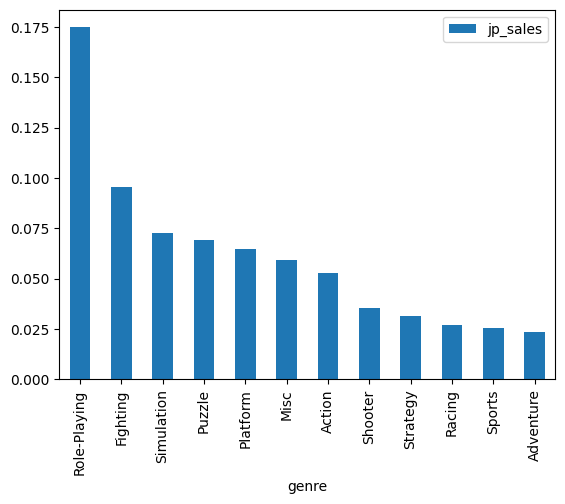

In [469]:
# Определим самые популярные жанры для региона JP для игр, выпущенных с 2013 года
data_top_JP_platforms_genre = since_2013_platforms.pivot_table(index='genre', values='jp_sales')
data_top_JP_platforms_genre.sort_values(by='jp_sales', ascending=False).plot(kind = 'bar')

In [470]:
# заменим NaN в столбце rating на no rating
since_2013_platforms = since_2013_platforms.fillna({'rating': 'no rating'})

In [471]:
# Определим, зависят ли продажи игр, выпущенных с 2013 года, в регионе NA от рейтинга
data_top_NA_platforms_rating = since_2013_platforms.pivot_table(index=['rating'], values='na_sales', aggfunc='sum')
data_top_NA_platforms_rating.sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,165.21
no rating,89.42
E,79.05
E10+,54.24
T,49.79


In [472]:
# Определим, зависят ли продажи игр, выпущенных с 2013 года, в регионе EU от рейтинга
data_top_EU_platforms_rating = since_2013_platforms.pivot_table(index=['rating'], values='eu_sales', aggfunc='sum')
data_top_EU_platforms_rating.sort_values(by='eu_sales', ascending=False) 

,eu_sales
rating,
M,145.32
E,83.36
no rating,78.91
E10+,42.69
T,41.95


In [473]:
# Определим, зависят ли продажи игр, выпущенных с 2013 года, в регионе JP от рейтинга
data_top_JP_platforms_rating = since_2013_platforms.pivot_table(index=['rating'], values='jp_sales', aggfunc='sum')
data_top_JP_platforms_rating.sort_values(by='jp_sales', ascending=False) 
 

,jp_sales
rating,
no rating,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


### Вывод

Самые популярные платформы (топ-5):

* Топ-5 СА: PS4, XOne, X360, PS3, 3DS

* Топ-5 Европы: PS4, PS3, XOne, X360, 3DS

* Топ-5 Японии: 3DS, PS3, PSV, PS4, WiiU

Выводы по продажам для топ-платформ:
* общее количество проданных игр на платформе, занимающей первое место, в Японии в 2.1 раза меньше, чем в Европе;
* продажи в СА и Европе имеют больше сходств между собой, чем с Японией. Топ-5 СА и Европы состоит из одних и тех же платформ, занимающих разные места, однако в обоих регионах лидирует PS4;
* в топ-5 Японии присутствуют PSV и WiiU, продажи которых в СА и Европе не входят в топ-5;
* в топ-5 Японии и Европы количество проданных копий для лидеров списков значительно выше занимающих вторые места;
* в Америке нет продаж для платформы PSP, в Японии они есть, но не очень высокие. Также в Японии нет продаж для PC и DS, а для Wii они очень низкие.


Самые популярные жанры (топ-5):

* Топ-5 жанров в СА: Shooter, Sports, Platform, Fighting, Misc	

* Топ-5 жанров в Европе: Shooter, Sports, Racing, Platform, Simulation

* Топ-5 жанров в Японии: Role-Playing, Fighting, Simulation, Puzzle, Platform	

Выводы по топ-жанрам:
* Топ-2 для СА и Европы идентичен, однако третьи-пятые места имеют лишь одно пересечение: Platform;
* в Японии с отрывом лидирует Role-Playing, отличаясь от следующей строчки, Fighting, в 1.8 раз;
* самый популярный в Японии жанр Role-Playing занимает лишь седьмое/восьмое места в СА и Европе соответственно.


Влияние рейтинга ESRB на продажи в отдельном регионе:
* во всех трех регионах продавались только игры с одим из четырех рейтингов: Everyone, Teen, Mature и Everyone 10 and older, либо вовсе без рейтинга;
* явный лидер в СА и Европе — жанр Mature, на втором месте - Everyone/no rating;
* в Японии же лидируют игры без рейтинга, на втором месте - Teen.



## 6. Гипотезы
<a name="hypothesis"></a>

### Задача

Проверьте гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

### Сформулируем и проверим гипотезы:

* H₀: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* H₁: cредние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [474]:
#создадим DataFrame с данными пользовательских рейтингов платформ Xbox One и PC
x_one_user_score = since_2013_platforms.query('platform == "XOne"')['user_score'].reset_index(drop=True)
pc_user_score = since_2013_platforms.query('platform == "PC"')['user_score'].reset_index(drop=True)

alpha = .05 # зададим критический уровень статистической значимости


results = st.ttest_ind(
    x_one_user_score, 
    pc_user_score, 
    equal_var = False,
    nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    

p-значение: 0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


In [475]:
# Мы можем проверить результат, вычислив средние двух выборок — они небольшого размера
since_2013_platforms.pivot_table(index='platform', values='user_score')

# Средние не равны, но показатели близки

,user_score
platform,
3DS,6.976250
DS,4.800000
PC,6.269677
PS3,6.348387
PS4,6.748249
PSP,5.850000
PSV,7.527273
Wii,5.257143
WiiU,7.017500


Мы сформулировали нулевую гипотезу о равенстве cредних пользовательских рейтингов платформ Xbox One и PC, т.к. нулевой гипотезой всегда должно проверяться равенство. Альтернативной гипотезой, соответственно, будет неравенство. Для оценки мы использовали данные о пользовательском рейтинге, сгруппированном по двум платформам.

T-test показал, что:

* мы не можем отвергнуть нулевую гипотезу о равенстве cредних пользовательских рейтингов платформ Xbox One и PC;
* pvalue 14%, т.е. вероятность получить такой результат случайно достаточно велика.

### Сформулируем и проверим гипотезы:
* H₀: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;
* H₁: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются.

In [476]:
#создадим DataFrame с данными жанров Action и Sports
action_user_score = since_2013_platforms.query('genre == "Action"')['user_score'].reset_index(drop=True)
sports_user_score = since_2013_platforms.query('genre == "Sports"')['user_score'].reset_index(drop=True)

alpha = .05 # зададим критический уровень статистической значимости


results = st.ttest_ind(
    action_user_score, 
    sports_user_score, 
    equal_var = False,
    nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700703482e-20
Отвергаем нулевую гипотезу


In [477]:
# Мы можем проверить результат, вычислив средние двух выборок — они небольшого размера
since_2013_platforms.pivot_table(index='genre', values='user_score')

# Средние не равны

,user_score
genre,
Action,6.837532
Adventure,7.461667
Fighting,7.037500
Misc,6.975000
Platform,6.713793
Puzzle,7.471429
Racing,6.080000
Role-Playing,7.376471
Shooter,6.342308


Мы сформулировали нулевую гипотезу о равенстве cредних пользовательских рейтингов жанров Action и Sports, т.к. нулевой гипотезой всегда должно проверяться равенство. Альтернативной гипотезой, соответственно, будет неравенство. Для оценки мы использовали данные о пользовательском рейтинге, сгруппированном по жанрам.

T-test показал, что:

* мы отвергаем нулевую гипотезу о равенстве cредних пользовательских рейтингов жанров Action и Sports;
* pvalue 1.446003970070351e-20, т.е. вероятность получить такой результат случайно чрезвычайно низка.

## 7. Общий вывод
<a name="sumup"></a>

В данном исследовании нам необходимо было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Из открытых источников нам были доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), определяющие успешность игры закономерности.

В ходе исследования мы проверили данные на ошибки и оценили их влияние на исследование. Затем мы устранили проблемы в данных, провели исследовательский анализ, рассмотрели две гипотезы и сделали вывод.

На этапе предобработки данных мы сделали следующие выводы:

* большинство игр начало продаваться в 2000-е;
* существует большой разброс в сторону увеличения количества продаж в Северной Америке и Европе, в первом процентиле все значения - нулевые, т.е. много игр не продавалось совсем, в то же время есть явные лидеры продаж с большим отрывом;
* в Японии и остальном мире продаж либо не было совсем, либо они были очень высокими.

Затем мы посчитали суммарные продажи во всех регионах и провели исследовательский анализ, который позволил нам сделать вывод о том, что по количеству выпущенных игр определенно лидирует период с 2005 по 2011 годы, с ярким пиком в 2008-2009 годах. Однако анализ данных за более чем 20-летний период не представляется логичным, за такой период факторы, влияющие на успех, скорее всего изменились, поэтому мы приняли решение **ограничить выборку периодом с 2013 года**.

На основании построенных графиков можно сделать вывод, что продажи по всем платформам упали к концу 2016 года, при этом для трех платформ падение продолжалось с 2013 года - видна устойчивая тенденция к снижению продаж. Продажи для PS4 и XOne за исследуемый период пережили взлет и начали медленное падение в 2015 году. Лидер по числу проданных копий - PS4 (пик в 2015 году - почти 119 млн.копий), затем с небольшим отрывом следует PS3 - 113.25 млн. копий в 2013 году. При этом в 2016 году для PS4 было продано всего 69.25 млн. копий, т.е. продажи упали в 1.7 раз. Минимум продаж к концу исследуемого периода пришелся на X360 - 1.52 млн.копий.

Затем мы посчитали корреляцию между отзывами и продажами, а также построили диаграмму рассеяния для самой успешной платформы PS4. На основании полученного результата мы сделали следующие выводы:

* самый высокий коэффициент корреляции между параметрами user score и critic score (5.5). Это значит, что отзывы критиков влияют на отзывы пользователей и наоборот, но это влияние не очень высокое. На диаграмме рассеяния также видно, что отзывов с положительными оценками со стороны обеих групп намного больше, чем с отрицательными. А варианты с низкими оценками с одной стороны и высокими с другой единичны;
* влияния отзывов пользователей на продажи практически нет, коэффициент очень низкий (-0.03), но в то же время он отрицательный, т.е. либо рост продаж минимально влияет на снижение оценки пользователями, либо наоборот. Коэффициент влияния оценки критиков на продажи выше— 0.4 — это говорит о том, что положительная корреляция присутствует. Диаграмма рассеяния также показывает, что скачки продаж на платформе происходили только для игр с высокими отзывами со стороны критиков.

Для остальных популярных платформ — 3DS, XOne, PS3, X360 — выводы представлены ниже:

* коэффициент корреляции между параметрами user score и critic score для данных платформ (кроме 3DS) так же невысок, для 3DS он составляет 0.77. Это значит, что для платформы 3DS отзывы критиков влияют на отзывы пользователей и наоборот. На диаграмме рассеяния также видно, что отзывов с положительными оценками со стороны обеих групп намного больше, чем с отрицательными. А варианты с низкими оценками с одной стороны и высокими с другой единичны;
* влияния отзывов на продажи практически нет, коэффициенты по-прежнему низкие. Самый высокий показатель зависимости между продажами и оценками критиков - у платформ XOne (0.42). Диаграмма рассеяния показывает, что скачки продаж на платформах происходили только для игр с высокими отзывами со стороны критиков, но со стороны пользователей для данных случаев оценки могли быть и невысокими.

Самым прибыльным жанром с явным отрывом от остальных является Shooter. В топ-5 также входят Sports, Role-Playing, Action и Racing. Также достаточно сильно заметна разница в продажах для жанров, находящихся внизу таблицы. Самый популярный жанр Shooter приносит в 12 раза больше дохода, чем самый неприбыльный жанр Strategy. 


Самые популярные платформы (топ-5):

* Топ-5 СА: PS4, XOne, X360, PS3, 3DS

* Топ-5 Европы: PS4, PS3, XOne, X360, 3DS

* Топ-5 Японии: 3DS, PS3, PSV, PS4, WiiU

Выводы по продажам для топ-платформ:
* общее количество проданных игр на платформе, занимающей первое место, в Японии в 2.1 раза меньше, чем в Европе;
* продажи в СА и Европе имеют больше сходств между собой, чем с Японией. Топ-5 СА и Европы состоит из одних и тех же платформ, занимающих разные места, однако в обоих регионах лидирует PS4;
* в топ-5 Японии присутствуют PSV и WiiU, продажи которых в СА и Европе не входят в топ-5;
* в топ-5 Японии и Европы количество проданных копий для лидеров списков значительно выше занимающих вторые места;
* в Америке нет продаж для платформы PSP, в Японии они есть, но не очень высокие. Также в Японии нет продаж для PC и DS, а для Wii они очень низкие.


Самые популярные жанры (топ-5):

* Топ-5 жанров в СА: Shooter, Sports, Platform, Fighting, Misc	

* Топ-5 жанров в Европе: Shooter, Sports, Racing, Platform, Simulation

* Топ-5 жанров в Японии: Role-Playing, Fighting, Simulation, Puzzle, Platform	

Выводы по топ-жанрам:
* Топ-2 для СА и Европы идентичен, однако третьи-пятые места имеют лишь одно пересечение: Platform;
* в Японии с отрывом лидирует Role-Playing, отличаясь от следующей строчки, Fighting, в 1.8 раз;
* самый популярный в Японии жанр Role-Playing занимает лишь седьмое/восьмое места в СА и Европе соответственно.

Влияние рейтинга ESRB на продажи в отдельном регионе:
* во всех трех регионах продавались только игры с одим из четырех рейтингов: Everyone, Teen, Mature и Everyone 10 and older, либо вовсе без рейтинга;
* явный лидер в СА и Европе — жанр Mature, на втором месте - Everyone/no rating;
* в Японии же лидируют игры без рейтинга, на втором месте - Teen.

Затем мы сформулировали нулевую гипотезу о равенстве cредних пользовательских рейтингов платформ Xbox One и PC, т.к. нулевой гипотезой всегда должно проверяться равенство. Для оценки мы использовали данные о пользовательском рейтинге, сгруппированном по двум платформам.
T-test показал, что мы не можем отвергнуть нулевую гипотезу о равенстве cредних пользовательских рейтингов платформ Xbox One и PC, т.к. pvalue равен 14%, т.е. вероятность получить такой результат случайно достаточно велика.

После этого мы сформулировали нулевую гипотезу о равенстве cредних пользовательских рейтингов жанров Action и Sports, т.к. нулевой гипотезой всегда должно проверяться равенство. Для оценки мы использовали данные о пользовательском рейтинге, сгруппированном по жанрам.
T-test показал, что мы отвергаем нулевую гипотезу о равенстве cредних пользовательских рейтингов жанров Action и Sports, т.к. pvalue равен 1.446003970070351e-20, т.е. вероятность получить такой результат случайно чрезвычайно низка.

Исходя из поставленной цели исследования мы можем сделать вывод, что определяющие успешность игры закономерности это:
* выпуск игры должен произойти в период, когда платформа находится на пике продаж или показывает устойчивый рост;
* жанр игры должен быть Shooter или Sports, если продажи в основном планируются в Северной Америке или Европе, и Role-Playing или Fighting, если целевая аудитормя проживает в Японии;
* рейтинг игры должен быть Everyone или Mature для СА и Европы, и Teen для Японии.

